# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ryan Harianto
- **Email:** ryanharianto1@gmail.com
- **ID Dicoding:** ryanharianto

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan layanan berbagi sepeda berubah sepanjang hari, dan pada jam berapa permintaan tertinggi terjadi untuk pengguna biasa maupun pengguna terdaftar?
- Apa pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [49]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [50]:
#Gathering Data 
#File path and load the data 
hour_df = pd.read_csv('data/data_2.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [51]:
#Gathering Data 
#File path and load the data 
day_df = pd.read_csv('data/data_1.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data hour memiliki data yang lebih detail dibandingkan dengan data day
- Data hour akan digunakan untuk menganalisis pola penggunaan sepanjang hari, menunjukkan jam-jam puncak permintaan tinggi, dan pengaruh cuaca terhadap penyewaan sepeda

### Assessing Data

In [52]:
#Checking the data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [53]:
#Checking if the data has a missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
#checking if there's a duplicate data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [55]:
#checking if the data valid
#checking if the instant start from 1
expected_instant = pd.Series(range(1, len(hour_df) + 1))
if not hour_df['instant'].equals(expected_instant):
    print("Error: 'instant' is not starting from 1")
#check if dteday is in valid format
try:
    pd.to_datetime(hour_df['dteday'], format='%Y-%m-%d')
except ValueError:
    print("Error: 'dteday' contains invalid date format")
#check if season values between 1 to 4
if not hour_df['season'].between(1,4).all():
    print("Error: season values are not between 1 to 4")
#check if yr values are 0(2011) or 1(2012)
if not hour_df['yr'].isin([0,1]).all():
    print("Error: yr values are not 0 or 1")
#check if mnth values are between 1 to 12
if not hour_df['mnth'].between(1, 12).all():
    print("Error: mnth values are not between 1 to 12")
#check if hr values are between 0 to 23
if not hour_df['hr'].between(0, 23).all():
    print("Error: hr values are not between 0 and 23")
#check if holiday values are 0 or 1
if not hour_df['holiday'].isin([0, 1]).all():
    print("Error: holiday values are not o or 1")
#check if weekday values are between 0 to 6
if not hour_df['weekday'].between(0, 6).all():
    print("Error: weekday values are not between 0 to 6")
#check if workingday values are 0 or 1
if not hour_df['workingday'].isin([0, 1]).all():
    print("Error: workingday values are not 0 or 1")
#check if weathersit values are 1, 2, 3, or 4
if not hour_df['weathersit'].isin([1, 2, 3, 4]).all():
    print("Error: weathersit values are not 1, 2, 3, or 4")
#check if temp is between 0 to 1
if not hour_df['temp'].between(0, 1).all():
    print("Error: temp values are not between 0 to 1")
#check if atemp is between 0 to 1
if not hour_df['atemp'].between(0, 1).all():
    print("Error: atemp values are not between 0 to 1")
#check if hum is between 0 to 1
if not hour_df['hum'].between(0, 1).all():
    print("Error: hum values are not between 0 to 1")
#check if windspeed is between 0 to 1
if not hour_df['windspeed'].between(0, 1).all():
    print("Error: windspeed values are not between 0 to 1")
#check if casual, registered, cnt are non negative integer 
if not(hour_df['casual'] >= 0).all():
    print("Error: casual values are negative")
if not (hour_df['registered'] >=0).all():
    print("Error: registered values are negative")
if not (hour_df['cnt'] >=0).all():
    print("Error: cnt values are negative")
print("Validation Success")

Validation Success


In [56]:
#checking if the sum of the casual and registered equal to count
hour_df['total_count'] = hour_df['casual']+hour_df['registered']
different = hour_df[hour_df['cnt'] != hour_df['total_count']]
if not different.empty:
    print("data found where cnt is not equal to casual + registered")
    print(different)
else:
    print("All values of cnt are equal to casual + registered")

All values of cnt are equal to casual + registered


In [57]:
#show the summary of the data
hour_df.describe() 

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,977.000000


**Insight:**
- Tidak ada data duplikat maupun data hilang
- Semua data valid atau tidak terdapat invalid data
- Value total cnt sama dengan total casual dan registered
- Total column terdapat 17379 record
- dteday seharusnya merupakan datetime bukan merupakan sebuah object
- Penyewaan sepeda lebih sering terjadi pada hari biasa dibandingkan pada hari libur (nilai mean pada holiday hanya 0.0287)
- Hari dengan cuaca cerah lebih banyak digunakan untuk menyewa sepeda, sementara cuaca buruk mengurangi permintaan
- Pengguna terdaftar lebih sering menyewa dibandingkan dengan pengguna casual

### Cleaning Data

In [58]:
#Change the format of 'dtetime' to datetime
datetime_columns = ['dteday']

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [59]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  cnt 

**Insight:**
- Kesalahan format pada dteday sudah diubah menjadi datetime yang sebelumnya adalah object

## Exploratory Data Analysis (EDA)

### Explore ...

In [60]:
#Check the summary statistic parameter 
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,181.387599


In [61]:
# Group by hour and calculate the average number of users
hourly_usage = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()

# Rename columns for clarity
hourly_usage.columns = ['Hour', 'Casual Users (Avg)', 'Registered Users (Avg)']

# Output the findings
print("Hourly Usage Summary:")
print(hourly_usage)

Hourly Usage Summary:
    Hour  Casual Users (Avg)  Registered Users (Avg)
0      0           10.158402               43.739669
1      1            6.504144               26.871547
2      2            4.772028               18.097902
3      3            2.715925                9.011478
4      4            1.253945                5.098996
5      5            1.411437               18.478382
6      6            4.161379               71.882759
7      7           11.055021              201.009629
8      8           21.679505              337.331499
9      9           30.891334              188.418157
10    10           46.477304              127.191197
11    11           59.540578              148.602476
12    12           68.293956              185.021978
13    13           72.308642              181.352538
14    14           75.567901              165.381344
15    15           74.905350              176.327846
16    16           73.745205              238.238356
17    17           74.27

**Insight:**
- Jam dengan permintaan tertinggi untuk Casual User adalah jam 14 dengan nilai rata-rata 75.57 user
- Jam dengan permintaan tertinggi untuk Registered User adalah jam 17 dengan nilai rata-rata 387.17 user

In [62]:
# Aggregate data by weather condition
weather_analysis = hour_df.groupby('weathersit')['cnt'].mean().reset_index()

# Define weather conditions
weather_conditions = {
    1: "Clear, Few clouds, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds",
    3: "Light Snow, Light Rain",
    4: "Heavy Rain, Ice Pallets, Thunderstorm"
}
weather_analysis['Weather'] = weather_analysis['weathersit'].map(weather_conditions)

# Sort by average rentals for better clarity
weather_analysis = weather_analysis.sort_values(by='cnt', ascending=False)

# Output the findings
print("\nAverage Rentals by Weather Condition:")
print(weather_analysis[['Weather', 'cnt']])


Average Rentals by Weather Condition:
                                 Weather         cnt
0       Clear, Few clouds, Partly cloudy  204.869272
1    Mist + Cloudy, Mist + Broken clouds  175.165493
2                 Light Snow, Light Rain  111.579281
3  Heavy Rain, Ice Pallets, Thunderstorm   74.333333


**Insight:**
- Rata-rata jumlah penyewaan tertinggi ketika cuaca cerah
- Rata-rata jumlah penyewaan terendah ketika cuaca buruk

## Visualization & Explanatory Analysis

### Pertanyaan 1:

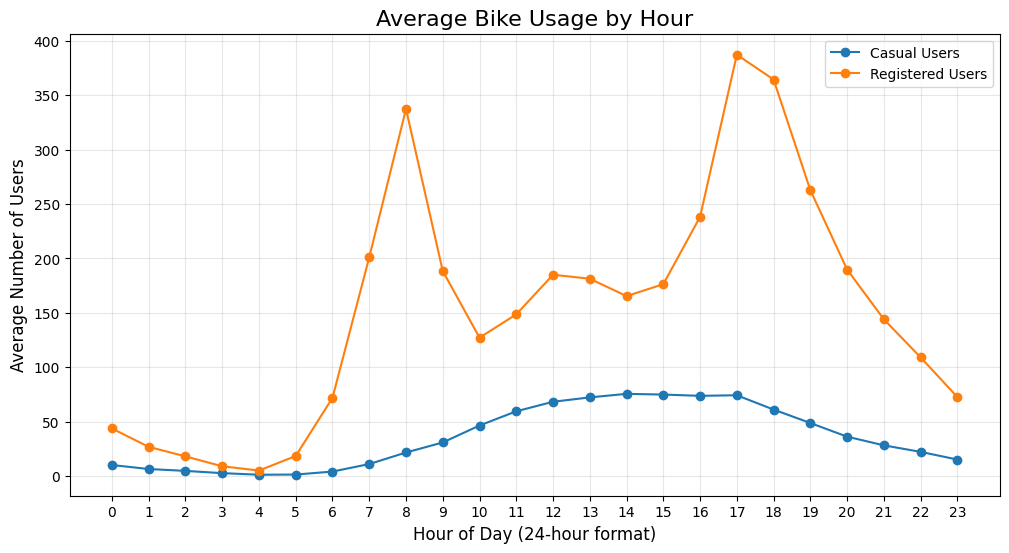

In [63]:
# Plot the usage patterns
plt.figure(figsize=(12, 6))
plt.plot(hourly_usage['Hour'], hourly_usage['Casual Users (Avg)'], label='Casual Users', marker='o')
plt.plot(hourly_usage['Hour'], hourly_usage['Registered Users (Avg)'], label='Registered Users', marker='o')
plt.title('Average Bike Usage by Hour', fontsize=16)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Average Number of Users', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Pertanyaan 2:

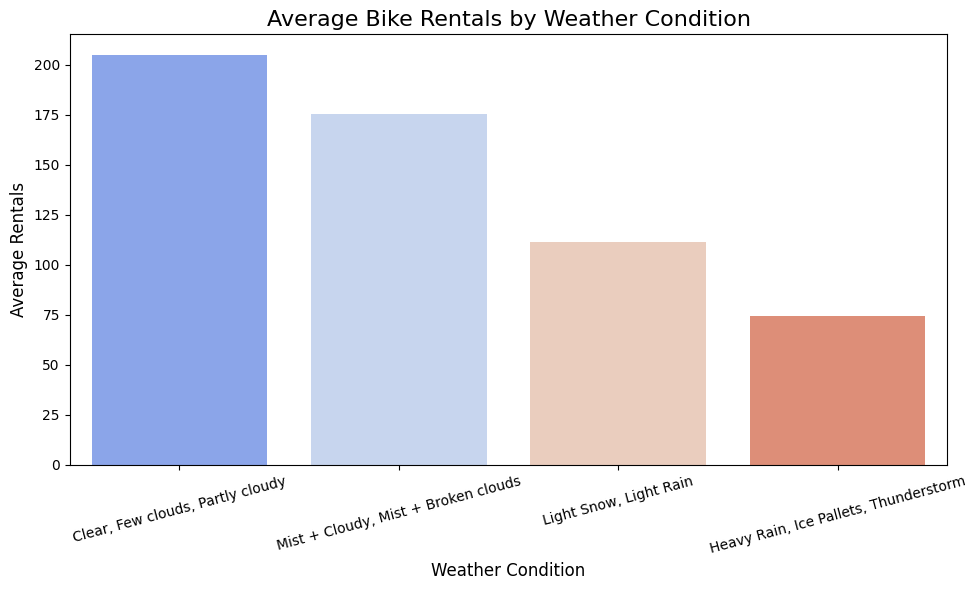

In [64]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_analysis, x='Weather', y='cnt', palette='coolwarm', hue='Weather', dodge=False, legend=False)
plt.title('Average Bike Rentals by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Insight:**
- Pertanyaan 1
  - Pola Perubahan Sepanjang Hari:
      - Pengguna Registered memiliki dua puncak utama
        - pagi jam 8 tertinggi
        - sore jam 17-18 puncak kedua
      - Pengguna casual menunjukan pola lebih rata dengan peningkatan antara jam 10 - 15
  - Jam Puncak Permintaan:
      - Registered User: Puncak tertinggi adalah jam 8 pagi dengan rata-rata 337 pengguna.
      - Casual User: Puncak tertinggi jam 14 dengan rata-rata 75 pengguna
- Pertanyaan 2
  - Kondisi terbaik untuk penyewaan sepeda adalah saat cuaca cerah atau sebagian berawan (kategori 1)
    - Penyewaan rata-rata tertinggi terjadi dalam kondisi ini karena pengguna merasa nyaman untuk bersepeda dalam kondisi yang baik
  - Kondisi penurunan permintaan terjadi saat kondisi cuaca yang buruk baik hujan atau salju ringan maupun cuaca ekstrem (kategori 3 dan 4)

## Analisis Lanjutan (Opsional)

In [65]:
# Group the data by 'dteday' (daily basis)
rfm_data = hour_df.groupby('dteday').agg(
    Recency=('dteday', lambda x: (hour_df['dteday'].max() - x.max()).days),  # Days since last rental
    Frequency=('cnt', 'count'),  # Total rental transactions in a day
    Monetary=('cnt', 'sum')  # Total bike rentals
).reset_index()
# Tambahkan validasi sebelum membuat kuartil
try:
    rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])  
except ValueError as e:
    print(f"Error in Recency scoring: {e}")

try:
    rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
except ValueError as e:
    print(f"Error in Frequency scoring: {e}")
    rfm_data['F_Score'] = pd.cut(rfm_data['Frequency'], bins=4, labels=[1, 2, 3, 4]) 
try:
    rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop') 
except ValueError as e:
    print(f"Error in Monetary scoring: {e}")
    rfm_data['M_Score'] = pd.cut(rfm_data['Monetary'], bins=4, labels=[1, 2, 3, 4]) 

# Combine RFM scores into a single score
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(int) + \
                        rfm_data['F_Score'].astype(int) + \
                        rfm_data['M_Score'].astype(int)

# Display the final RFM analysis
print(rfm_data.head())

Error in Frequency scoring: Bin labels must be one fewer than the number of bin edges
      dteday  Recency  Frequency  Monetary R_Score F_Score M_Score  RFM_Score
0 2011-01-01      730         24       985       1       4       1          6
1 2011-01-02      729         23       801       1       4       1          6
2 2011-01-03      728         22      1349       1       4       1          6
3 2011-01-04      727         23      1562       1       4       1          6
4 2011-01-05      726         23      1600       1       4       1          6


In [66]:
def segment_customer(row):
    if row['RFM_Score'] >= 9:
        return 'VIP'
    elif row['RFM_Score'] >= 5:
        return 'Regular'
    else:
        return 'Churn Risk'

rfm_data['Segment'] = rfm_data.apply(segment_customer, axis=1)
print(rfm_data.groupby('Segment').size())


Segment
Churn Risk      2
Regular       333
VIP           396
dtype: int64


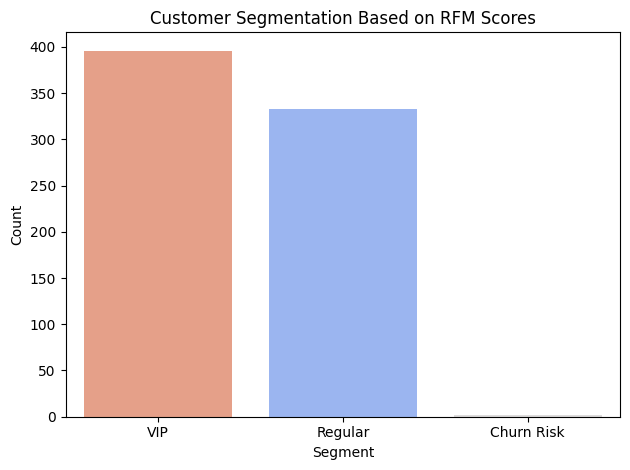

Segment Distribution:
Segment
VIP           396
Regular       333
Churn Risk      2
Name: count, dtype: int64
Segment Summary Statistics:
      Segment     Recency  Frequency     Monetary  RFM_Score
0  Churn Risk  708.500000  10.000000   557.000000   4.000000
1     Regular  537.717718  23.621622  3060.234234   7.132132
2         VIP  218.025253  23.972222  5738.654040  10.563131


In [67]:
sns.countplot(
    data=rfm_data, 
    x='Segment', 
    palette='coolwarm', 
    order=['VIP', 'Regular', 'Churn Risk'], 
    hue='Segment' 
)
plt.legend([], [], frameon=False)  
plt.title('Customer Segmentation Based on RFM Scores')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# Insight Generation:
# 1. Look at the distribution of segments
segment_counts = rfm_data['Segment'].value_counts()
print(f"Segment Distribution:\n{segment_counts}")

# 2. Segment-wise summary statistics
segment_summary = rfm_data.groupby('Segment').agg(
    Recency=('Recency', 'mean'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Monetary', 'mean'),
    RFM_Score=('RFM_Score', 'mean')
).reset_index()

print(f"Segment Summary Statistics:\n{segment_summary}")

- Dominasi terdapat pada VIP dan Regular yang berarti layanan berbagi sepeda dalam kondisi baik, dengan basis pelanggan yang aktif maupun loyal
- Fokus untuk mendorong lebih banyak pengguna dari Regular ke VIP, sambil memperhatikan Churn Risk agar tetap dalam kondisi rendah

## Conclusion

- Conclusion pertanyaan 1
  - Pengguna Registered memiliki dua puncak utama
        - pagi jam 8 tertinggi
        - sore jam 17-18 puncak kedua
  - Pengguna casual menunjukan pola lebih rata dengan peningkatan antara jam 10 - 15
  - Registered user lebih aktif pada jam sibuk di pagi dan sore hari, menunjukan bahwa layanan ini sering digunakan untuk keperluan perjalanan kerja
  - Casual user lebih aktif di siang hari, menunjukan penggunaan lebih bersifat santai ataupun untuk rekreasi
  - Layanan dapat menambah jumlah sepeda pada jam-jam terjadinya puncak penyewaan
  - Untuk menambah pada pagi hari dapat dilakukan dengan menambahkan promosi seperti diskon, dan untuk hari libur atau rekreasi dapat dilakukan promosi pada tempat-tempat rekreasi untuk menambah jumlah penyewaan
- Conclusion pertanyaan 2
  - Cuaca menunjukan sebagai faktor utama dalam perencanaan operasional yang mungkin dapat mempersiapkan lebih banyak pada hari-hari dengan cuaca baik, sebaliknya pada lokasi prediksi cuaca buruk layanan dapat mengurangi distribusi sepeda di lokasi tersebut untuk mengoptimalkan operasional

In [68]:
hour_df.to_csv("main_data.csv", index=False)